# Functional API - Callbacks - Save - Save the best

In [40]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = fetch_california_housing()
df.keys()

X = df.data
y = df.target
X_train_full, X_test  ,    y_train_full, y_test   = train_test_split(X, y, random_state=42)
X_train, X_valid      ,    y_train,y_valid        = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)



### 1) création model avec API

In [41]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

### 2) Entainer le model

In [42]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae'])
model_h = model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/80
11610/11610 [==============================] - 1s 118us/sample - loss: 1.2390 - mae: 0.7981 - val_loss: 0.6566 - val_mae: 0.5909
Epoch 2/80
11610/11610 [==============================] - 1s 72us/sample - loss: 0.6312 - mae: 0.5804 - val_loss: 0.6734 - val_mae: 0.5577
Epoch 3/80
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5886 - mae: 0.5556 - val_loss: 0.5574 - val_mae: 0.5320
Epoch 4/80
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5595 - mae: 0.5403 - val_loss: 0.5235 - val_mae: 0.5200
Epoch 5/80
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5361 - mae: 0.5288 - val_loss: 0.5011 - val_mae: 0.5072
Epoch 6/80
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5178 - mae: 0.5194 - val_loss: 0.5065 - val_mae: 0.5019
Epoch 7/80
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5016 - mae: 0.5104 - val_loss: 0.

11610/11610 [==============================] - 1s 72us/sample - loss: 0.3504 - mae: 0.4171 - val_loss: 0.3316 - val_mae: 0.4072
Epoch 60/80
11610/11610 [==============================] - 1s 71us/sample - loss: 0.3497 - mae: 0.4160 - val_loss: 0.3777 - val_mae: 0.4113
Epoch 61/80
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3495 - mae: 0.4155 - val_loss: 0.3372 - val_mae: 0.4083
Epoch 62/80
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3486 - mae: 0.4149 - val_loss: 0.3815 - val_mae: 0.4144
Epoch 63/80
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3481 - mae: 0.4144 - val_loss: 0.3322 - val_mae: 0.4128
Epoch 64/80
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3478 - mae: 0.4150 - val_loss: 0.3652 - val_mae: 0.4109
Epoch 65/80
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3470 - mae: 0.4144 - val_loss: 0.3309 - val_mae: 0.4034
Epoch 66/80
11610/11610 [=======

### 3) tester la performence de model

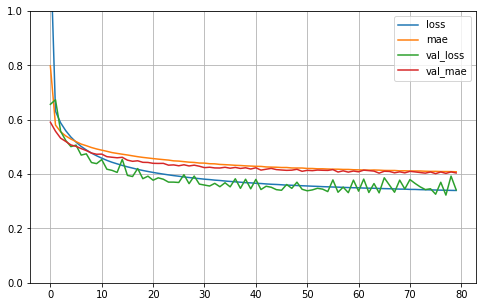

5160/5160 [==============================] - 0s 35us/sample - loss: 0.3423 - mae: 0.4108


[0.34228383381237354, 0.41079816]

In [43]:
#model_h.history
#model_h.params
pd.DataFrame(model_h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test, y_test)

### 4) Enregistrement le model restoring

In [44]:
model.save("my_Func_model.h5")
%pwd

'C:\\Users\\qanna\\OneDrive\\Bureau\\Udemy\\01\\Files\\Python_codes'

In [45]:
del model
keras.backend.clear_session()

In [46]:
model = keras.models.load_model("my_Func_model.h5")

# utilise Callbacks pendent l'entrainement

### 1) Création model

In [47]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

### 2) Entrainement et callbacks (Sauvgarder tous les models)

In [48]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

model_h = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 122us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/10
11610/11610 [==============================] - 1s 72us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/10
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/10
11610/11610 [==============================] - 1s 69us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/10
11610/11610 [==============================] - 1s 81us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/10
11610/11610 [==============================] - 1s 83us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/10
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/10
11610/11610 [==============================] - 1s 88us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/10
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4576 - val_

# Enregistraier The best model

### 1) Création le model 

In [49]:
del model
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

### 2) Entrainement et sauvgarder selement the best

In [50]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)
model_h = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 119us/sample - loss: 1.8306 - val_loss: 3.9625
Epoch 2/10
11610/11610 [==============================] - 1s 72us/sample - loss: 0.7975 - val_loss: 0.7856
Epoch 3/10
11610/11610 [==============================] - 1s 74us/sample - loss: 0.6811 - val_loss: 0.6213
Epoch 4/10
11610/11610 [==============================] - 1s 76us/sample - loss: 0.6271 - val_loss: 0.5901
Epoch 5/10
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5845 - val_loss: 0.5802
Epoch 6/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5501 - val_loss: 0.5267
Epoch 7/10
11610/11610 [==============================] - 1s 86us/sample - loss: 0.5212 - val_loss: 0.4934
Epoch 8/10
11610/11610 [==============================] - 1s 108us/sample - loss: 0.4983 - val_loss: 0.4608
Epoch 9/10
11610/11610 [==============================] - 1s 94us/sample - loss: 0.4795 - val

### 3) Entrainement et sauvgartder only the best et s'arreter

In [51]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model_h = model.fit(X_train, y_train, epochs=200,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])



Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 108us/sample - loss: 0.4522 - val_loss: 0.4202
Epoch 2/200
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4422 - val_loss: 0.4142
Epoch 3/200
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4338 - val_loss: 0.4155
Epoch 4/200
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4269 - val_loss: 0.4096
Epoch 5/200
11610/11610 [==============================] - 1s 80us/sample - loss: 0.4206 - val_loss: 0.4019
Epoch 6/200
11610/11610 [==============================] - 1s 80us/sample - loss: 0.4153 - val_loss: 0.4208
Epoch 7/200
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4109 - val_loss: 0.4006
Epoch 8/200
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4069 - val_loss: 0.3925
Epoch 9/200
11610/11610 [==============================] - 1s 72us/sample - loss: 0.40

Epoch 76/200
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3420 - val_loss: 0.3274
Epoch 77/200
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3418 - val_loss: 0.3280
Epoch 78/200
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3413 - val_loss: 0.3266
Epoch 79/200
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3409 - val_loss: 0.3335
Epoch 80/200
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3405 - val_loss: 0.3292
Epoch 81/200
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3394 - val_loss: 0.3298
Epoch 82/200
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3400 - val_loss: 0.3254
Epoch 83/200
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3394 - val_loss: 0.3270
Epoch 84/200
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3389 - val_loss: 0.3283
Epoch 85/200
11610/

11610/11610 [==============================] - 1s 62us/sample - loss: 0.3174 - val_loss: 0.3586
Epoch 151/200
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3167 - val_loss: 0.3049
Epoch 152/200
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3164 - val_loss: 0.3129
Epoch 153/200
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3163 - val_loss: 0.3259
Epoch 154/200
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3156 - val_loss: 0.3136
Epoch 155/200
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3151 - val_loss: 0.3289
Epoch 156/200
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3155 - val_loss: 0.3488
Epoch 157/200
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3148 - val_loss: 0.3203
Epoch 158/200
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3147 - val_loss: 0.3233
Epoch 159/200
11610/1161